In [33]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [56]:
last=100
url:str = f"http://api.nbp.pl/api/exchangerates/rates/A/EUR/last/{last}"
payload = {}
response = requests.request("GET", url, data=payload)
response.status_code

200

In [27]:
df = pd.DataFrame.from_dict(response.json()['rates'])
df['effectiveDate'] = pd.to_datetime(df['effectiveDate'], format="%Y-%m-%d")

array(['2023-08-09T00:00:00.000000000', '2023-08-10T00:00:00.000000000',
       '2023-08-11T00:00:00.000000000', '2023-08-14T00:00:00.000000000',
       '2023-08-16T00:00:00.000000000', '2023-08-17T00:00:00.000000000',
       '2023-08-18T00:00:00.000000000', '2023-08-21T00:00:00.000000000',
       '2023-08-22T00:00:00.000000000', '2023-08-23T00:00:00.000000000',
       '2023-08-24T00:00:00.000000000', '2023-08-25T00:00:00.000000000',
       '2023-08-28T00:00:00.000000000', '2023-08-29T00:00:00.000000000',
       '2023-08-30T00:00:00.000000000', '2023-08-31T00:00:00.000000000',
       '2023-09-01T00:00:00.000000000', '2023-09-04T00:00:00.000000000',
       '2023-09-05T00:00:00.000000000', '2023-09-06T00:00:00.000000000',
       '2023-09-07T00:00:00.000000000', '2023-09-08T00:00:00.000000000',
       '2023-09-11T00:00:00.000000000', '2023-09-12T00:00:00.000000000',
       '2023-09-13T00:00:00.000000000', '2023-09-14T00:00:00.000000000',
       '2023-09-15T00:00:00.000000000', '2023-09-18

In [45]:
np.linspace(-last+1, 0, last)

array([-99., -98., -97., -96., -95., -94., -93., -92., -91., -90., -89.,
       -88., -87., -86., -85., -84., -83., -82., -81., -80., -79., -78.,
       -77., -76., -75., -74., -73., -72., -71., -70., -69., -68., -67.,
       -66., -65., -64., -63., -62., -61., -60., -59., -58., -57., -56.,
       -55., -54., -53., -52., -51., -50., -49., -48., -47., -46., -45.,
       -44., -43., -42., -41., -40., -39., -38., -37., -36., -35., -34.,
       -33., -32., -31., -30., -29., -28., -27., -26., -25., -24., -23.,
       -22., -21., -20., -19., -18., -17., -16., -15., -14., -13., -12.,
       -11., -10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,
         0.])

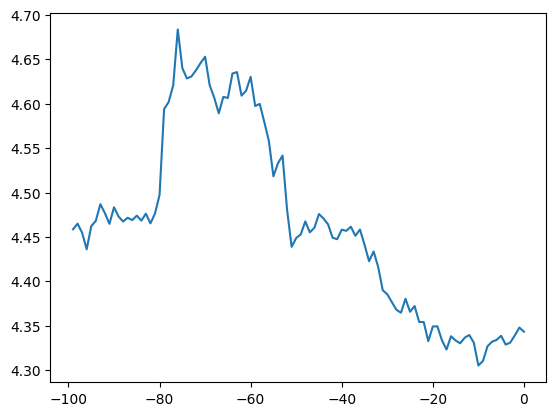

In [53]:
# fig, ax = plt.subplots()
# ax.plot(df['mid'])
# plt.xticks(np.linspace(-last+1, 0, last))
# plt.show()
# # plt.xticks(np.linspace(-last+1, 0, last))
# # plt.plot(df['mid'])

plt.plot(np.linspace(-last+1, 0, last), df['mid'])

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0, 0, '1.0')])

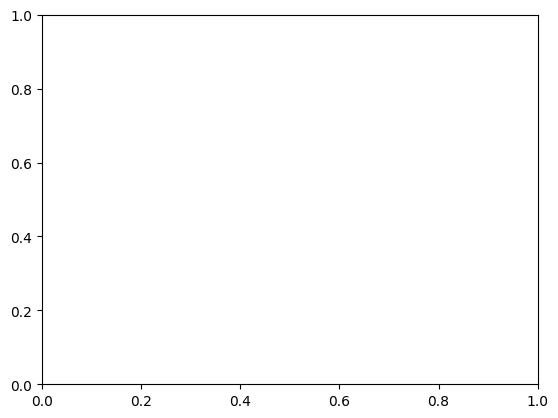

In [37]:
plt.xticks()